In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#Choose a random 5D vector W, where the first dimension lies between (0,1), 2nd dimension between (1,2), 3rd between (2,3) etc. 
W = np.array([0.45, 1.5, 2.3, 3.56, 4.2])
W

array([0.45, 1.5 , 2.3 , 3.56, 4.2 ])

In [3]:
# Use it to generate N=1000 data-points {Xi, Yi}, where Yi = W.Xi + ei, where Xi is a 5D feature vector where each feature is uniformly between (-10, 10) and ei is a random value between -1 and 1
X = np.random.uniform(low = -10,high = 10, size=(1000,5))
Y = np.dot(X, W) 
e = np.random.uniform(low = -1,high = 1, size=(1000,))
Y = Y + e
print(X.shape, Y.shape)

(1000, 5) (1000,)


In [4]:
#Fit a linear regression model on (Xi, Yi) and estimate W1. 
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)
W1 = reg.coef_
W1

array([0.4496771 , 1.49452865, 2.29858038, 3.56214322, 4.19760243])

In [5]:
#Calculate the estimation error ||W-W1||2 and the MSE (1/N)*∑(Yi-W1.Xi)2
error = np.linalg.norm(W-W1)
mse = np.mean((Y - np.dot(X, W1))**2)
print("error = ", error)
print("mse = ", mse)

error =  0.0065112958266502555
mse =  0.33090877961933424


In [6]:
#Fit a LASSO regression model on (Xi, Yi) and estimate W2 for different values of λ (1 to 20).
from sklearn.linear_model import Lasso
W2 = []
for i in range(1, 21):
    reg = Lasso(alpha = i).fit(X, Y)
    W2.append(reg.coef_)
W2

[array([0.42192092, 1.46548782, 2.26724763, 3.53418877, 4.16826699]),
 array([0.39415386, 1.4364437 , 2.23591337, 3.50623552, 4.13893219]),
 array([0.36638679, 1.40739957, 2.20457911, 3.47828227, 4.10959739]),
 array([0.33861972, 1.37835545, 2.17324484, 3.45032903, 4.08026258]),
 array([0.31085265, 1.34931132, 2.14191058, 3.42237578, 4.05092778]),
 array([0.28308558, 1.3202672 , 2.11057632, 3.39442253, 4.02159297]),
 array([0.25531852, 1.29122307, 2.07924205, 3.36646928, 3.99225817]),
 array([0.22755145, 1.26217894, 2.04790779, 3.33851604, 3.96292337]),
 array([0.19978438, 1.23313482, 2.01657353, 3.31056279, 3.93358856]),
 array([0.17201731, 1.20409069, 1.98523927, 3.28260954, 3.90425376]),
 array([0.14425024, 1.17504657, 1.953905  , 3.25465629, 3.87491895]),
 array([0.11648317, 1.14600244, 1.92257074, 3.22670305, 3.84558415]),
 array([0.08871611, 1.11695832, 1.89123648, 3.1987498 , 3.81624934]),
 array([0.06094904, 1.08791419, 1.85990221, 3.17079655, 3.78691454]),
 array([0.03318197, 

[array([0.42192092, 1.46548782, 2.26724763, 3.53418877, 4.16826699]), array([0.39415386, 1.4364437 , 2.23591337, 3.50623552, 4.13893219]), array([0.36638679, 1.40739957, 2.20457911, 3.47828227, 4.10959739]), array([0.33861972, 1.37835545, 2.17324484, 3.45032903, 4.08026258]), array([0.31085265, 1.34931132, 2.14191058, 3.42237578, 4.05092778]), array([0.28308558, 1.3202672 , 2.11057632, 3.39442253, 4.02159297]), array([0.25531852, 1.29122307, 2.07924205, 3.36646928, 3.99225817]), array([0.22755145, 1.26217894, 2.04790779, 3.33851604, 3.96292337]), array([0.19978438, 1.23313482, 2.01657353, 3.31056279, 3.93358856]), array([0.17201731, 1.20409069, 1.98523927, 3.28260954, 3.90425376]), array([0.14425024, 1.17504657, 1.953905  , 3.25465629, 3.87491895]), array([0.11648317, 1.14600244, 1.92257074, 3.22670305, 3.84558415]), array([0.        , 1.11695832, 1.89123648, 3.1987498 , 3.81624934]), array([0.        , 1.08791419, 1.85990221, 3.17079655, 3.78691454]), array([0.        , 1.05887007, 1.

Text(0, 0.5, 'MSE')

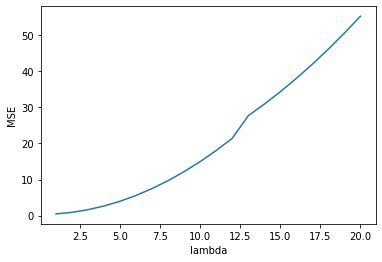

In [7]:
#Sparsify each W2 to obtain W3 by setting all values below a certain threshold to 0 (you can choose the threshold). 
W3 = []
for i in range(0, 20):
    W3.append(np.where(abs(W2[i]) < 0.1, 0, W2[i]))
print(W3)
#Plot the MSE (1/N)*∑(Yi-W3.Xi)2 as a function of λ. 
mse = []
for i in range(0, 20):
    mse.append(np.mean((Y - np.dot(X, W3[i]))**2))

lamb = [i for i in range(1, 21)]
plt.plot(lamb, mse)
plt.xlabel('lambda')
plt.ylabel('MSE')
